# Digits Recognition Dataset

In [9]:
from sklearn import datasets
import  matplotlib.pyplot as plt
import numpy as np
digits = datasets.load_digits()

print(digits.keys())
#print(digits.DESCR)

print(digits.images.shape)
print(digits.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


Show image

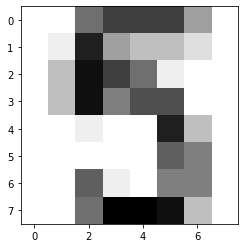

In [7]:
plt.imshow(digits.images[1010],
           cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.show()

## Train/Test+Fit/Predict/Accuracy

In [11]:
from  sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.2,
                                                    random_state= 42,
                                                    stratify=digits.target)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

knnScore = knn.score(X_test, y_test)
print("Score: {}".format(knnScore))

[5 2 8 1 7 2 6 2 6 5 0 5 9 3 4 4 2 4 9 9 6 3 8 1 2 5 6 0 3 4 6 7 2 6 6 6 8
 5 0 9 1 7 9 6 5 7 5 2 7 5 0 1 5 5 3 2 4 0 0 2 7 5 6 1 3 7 6 5 7 0 9 0 3 8
 2 5 7 2 3 5 9 3 2 7 9 6 8 1 0 1 2 9 4 4 1 2 7 8 4 2 6 8 3 7 3 9 6 1 1 0 9
 2 1 6 3 4 8 7 1 0 0 4 6 5 8 2 8 1 3 0 0 8 6 4 3 9 3 3 3 3 0 7 0 0 1 9 5 8
 1 5 0 6 6 6 6 1 7 7 6 7 7 8 7 3 6 5 9 0 3 8 0 9 8 1 9 5 9 5 8 9 9 7 9 1 9
 5 4 7 3 0 4 9 7 7 5 6 5 8 3 4 5 4 9 2 5 5 2 1 3 8 8 9 3 6 1 0 1 4 0 5 5 6
 6 7 4 3 8 4 1 0 7 9 2 8 4 8 4 2 4 0 0 0 2 6 7 0 4 5 2 2 9 0 4 6 8 2 3 9 2
 3 0 6 8 7 1 4 4 1 1 6 3 8 1 2 5 7 8 3 2 0 3 4 1 9 9 9 6 3 7 1 6 9 4 7 1 8
 1 3 0 5 3 4 1 9 3 5 4 7 4 1 5 1 5 0 9 8 4 2 3 8 4 1 2 0 1 1 4 4 5 7 5 0 3
 2 2 4 2 7 7 8 7 6 3 1 1 5 8 8 8 6 7 2 7 8 9 4 2 0 3 4]
Score: 0.9833333333333333


## Overfitting & Underfitting

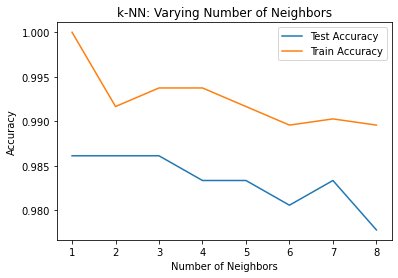

In [12]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title("k-NN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy,label="Test Accuracy")
plt.plot(neighbors, train_accuracy, label="Train Accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Conclussion

We can see that k= 3 is a good value, since 1 is overfitting and beyond 4 the precision decrease.